In [1023]:
import pandas as pd
pd.pandas.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

In [1024]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [1025]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [1026]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

## Data Cleaning

### Mssubclass

In [1027]:
'''
20: Tek katlı 1946 dan yeni evler
30 Tek katlı 1945 den eski
40 Tek katlı, çatı katı tamamlanmış, her yaştan olabilir
45: 1.5 kat+yarım çatı katı, her yaş
50: 1.5 kat+çatı katı
60: 2 kat 1946 dan yeni
70: 2 kat 1945 den eski
75: 2.5 kat, her yaş
80: 2 veya daha fazla seviyede düşey olarak bölünmüş evler
85: giriş katının iki farklı seviyeye bölündüğünü belirtir
90: duplex
120: Tek kat, 46 dan yeni +PUD
150: 1.5 kat her yaş+PUD
160: 2 kat 46 dan yeni +PUD
180: 2 veya daha fazla seviye+PUD
190: 2 ailelik ve her yaş

120-150-160-180 : PUD
190:2 aile
80-85-90: Multilevel
60-70-75: >2kat
45-50:1.5 kat
20-30-40: 1 kat
'''
df.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [1028]:
def MSSubClass_transform(text):
    
    if (text==20 or text==30 or text==40):
        return '1 kat'
    
    elif (text==45 or text==50):
        return '1.5 kat'
    
    elif (text==60 or text==70 or text==75):
        return '2 kat'
    
    elif (text==80 or text==85 or text==90):
        return 'multilevel'
    
    elif text==190:
        return '2 aile'
    
    elif (text==160 or text==120 or text==150 or text==180):
        return 'PUD'
    
    else:
        return 'Other'

In [1029]:
df['MSSubClass'] = df['MSSubClass'].apply(lambda x:MSSubClass_transform(x))
df_test['MSSubClass'] = df_test['MSSubClass'].apply(lambda x:MSSubClass_transform(x))

df = pd.get_dummies(df, columns = ["MSSubClass"])
df_test = pd.get_dummies(df_test, columns = ["MSSubClass"])

### Mszoning

In [1030]:
'''
RL: Düşük yoğunluklu bölge
RM: Orta yoğunluklu
FV: Su kenarı köy tipi
RH: Yüksek yoğunluk
C: Ticari mülk vs
'''
df.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [1031]:
df_test["MSZoning"].fillna(df.MSZoning.mode()[0], inplace=True)

In [1032]:
def MSZoning_transform(text):
    
    if text=='RL' :
        return 1
    
    elif text=='FV':
        return 0
    
    elif text=='RM':
        return 2
    
    elif text=='RH':
        return 3
    
   
    
    else:
        return 4

In [1033]:
df['MSZoning'] = df['MSZoning'].apply(lambda x:MSZoning_transform(x))
df_test['MSZoning'] = df_test['MSZoning'].apply(lambda x:MSZoning_transform(x))

In [1034]:
df.drop(columns='Id', inplace=True)

### LotFrontage

In [1035]:
df["LotFrontage"].fillna(df.LotFrontage.mean(), inplace=True)
df_test["LotFrontage"].fillna(df.LotFrontage.mean(), inplace=True)

In [1036]:
scaler = preprocessing.MinMaxScaler()
scaler_s = preprocessing.StandardScaler()

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

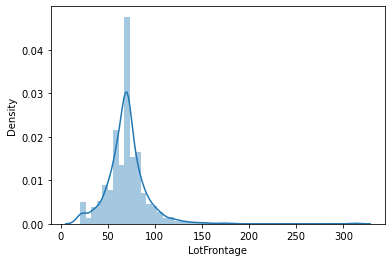

In [1037]:
sns.distplot(df.LotFrontage)

In [1038]:
from scipy import stats


# Örnek verileri oluşturma


# Box-Cox dönüşümü

data, param = stats.boxcox(np.log(df.LotFrontage))
data2, param = stats.boxcox(np.log(df_test.LotFrontage))

print("Box-Cox dönüşümü sonrası:")
print("Ortalama değer:", data.mean())
print("Standart sapma:", data.std())


from scipy.stats import shapiro



# Shapiro-Wilk normalite testini yap
stat, p = shapiro(scaler.fit_transform(data.reshape(-1,1)))
print("SHAPIRO:\n")
print('Test İstatistiği=%.3f, p-değeri=%.3f' % (stat, p))

# p-değeri 0.05'ten küçükse, normal dağılımdan sapma olduğunu söyleyebiliriz
if p > 0.05:
    print('Dizi normal dağılıyor')
else:
    print('Dizi normal dağılmıyor')
    
    


Box-Cox dönüşümü sonrası:
Ortalama değer: 24.665287546078194
Standart sapma: 5.369631535702976
SHAPIRO:

Test İstatistiği=0.926, p-değeri=0.000
Dizi normal dağılmıyor


In [1039]:
df['LotFrontage'] = scaler.fit_transform(data.reshape(-1,1))
df_test['LotFrontage'] = scaler.fit_transform(data2.reshape(-1,1))

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

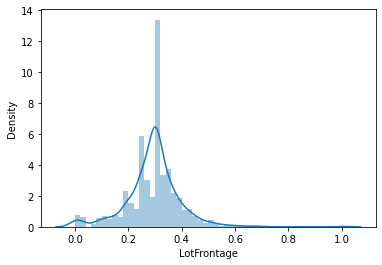

In [1040]:
sns.distplot(df.LotFrontage)

### LotArea

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotArea', ylabel='Density'>

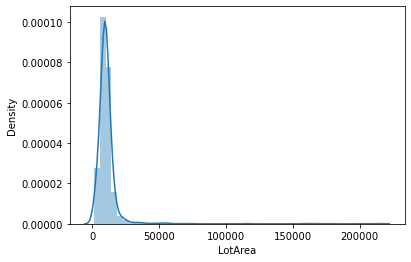

In [1041]:
sns.distplot(df.LotArea)

In [1042]:
from scipy import stats


# Örnek verileri oluşturma


# Box-Cox dönüşümü
data, param = stats.boxcox(df.LotArea)
data2, param = stats.boxcox(df_test.LotArea)

print("Box-Cox dönüşümü sonrası:")
print("Ortalama değer:", data.mean())
print("Standart sapma:", data.std())


from scipy.stats import shapiro



# Shapiro-Wilk normalite testini yap
stat, p = shapiro(scaler.fit_transform(data.reshape(-1,1)))
print("\nSHAPIRO:\n")
print('Test İstatistiği=%.3f, p-değeri=%.3f' % (stat, p))

# p-değeri 0.05'ten küçükse, normal dağılımdan sapma olduğunu söyleyebiliriz
if p > 0.05:
    print('Dizi normal dağılıyor')
else:
    print('Dizi normal dağılmıyor')
    
    


Box-Cox dönüşümü sonrası:
Ortalama değer: 10.530430915249726
Standart sapma: 0.6853697015605438

SHAPIRO:

Test İstatistiği=0.905, p-değeri=0.000
Dizi normal dağılmıyor


C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

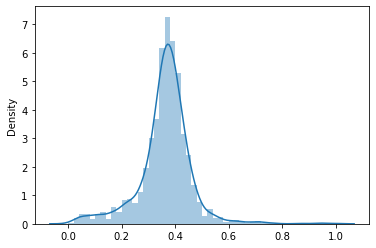

In [1043]:
sns.distplot(scaler.fit_transform(data.reshape(-1,1)))

In [1044]:
df["LotArea"]=scaler.fit_transform(data.reshape(-1,1))
df_test["LotArea"]=scaler.fit_transform(data2.reshape(-1,1))

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotArea', ylabel='Density'>

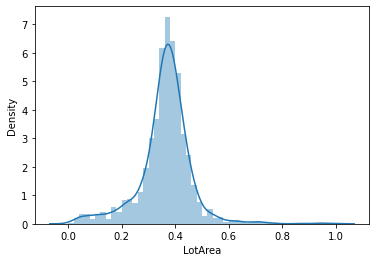

In [1045]:
sns.distplot(df.LotArea)

### Street

In [1046]:
df.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [1047]:
df.groupby("Street").mean()

C:\Users\Mehmet\AppData\Local\Temp\ipykernel_28556\800994635.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Street").mean()


,MSZoning,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_1 kat,MSSubClass_1.5 kat,MSSubClass_2 aile,MSSubClass_2 kat,MSSubClass_PUD,MSSubClass_multilevel
Street,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Grvl,2.166667,0.350418,0.530135,4.833333,4.833333,1961.333333,1963.833333,55.000000,554.666667,143.166667,325.000000,1022.833333,1126.833333,27.833333,0.000000,1154.666667,0.833333,0.000000,1.166667,0.166667,2.50000,1.000000,5.333333,0.666667,1967.400000,2.000000,632.000000,129.333333,52.500000,0.000000,0.000000,43.833333,0.000000,219.000000,6.166667,2008.333333,130190.500000,0.500000,0.00000,0.166667,0.000000,0.000000,0.333333
Pave,1.143054,0.292344,0.361436,6.104539,5.578404,1971.308803,1984.952545,103.887275,443.181568,46.150619,568.240028,1057.572215,1162.774415,348.309491,5.868638,1516.952545,0.423659,0.057772,1.566713,0.383769,2.86795,1.046768,6.522696,0.612792,1978.546579,1.766162,472.323934,94.099725,46.636176,22.044704,3.423659,14.942228,2.770289,42.764787,6.322558,2007.813618,181130.538514,0.416781,0.10729,0.019945,0.257909,0.110041,0.088033


In [1048]:
df = pd.get_dummies(df, columns = ["Street"])
df_test = pd.get_dummies(df_test, columns = ["Street"])

### Alley

In [1049]:
df.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [1050]:
df["Alley"].fillna('have not', inplace=True)
df_test["Alley"].fillna('have not', inplace=True)

In [1051]:
df = pd.get_dummies(df, columns = ["Alley"])
df_test = pd.get_dummies(df_test, columns = ["Alley"])

### Lotshape

In [1052]:
df.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [1053]:
mapping = {'IR1': 'IR', 'IR2': 'IR', 'IR3': 'IR'}

# replace() metodunu kullanarak değişikliği uyguluyoruz
df['LotShape'] = df['LotShape'].replace(mapping)
df_test['LotShape'] = df_test['LotShape'].replace(mapping)

In [1054]:
df = pd.get_dummies(df, columns = ["LotShape"])
df_test = pd.get_dummies(df_test, columns = ["LotShape"])

### Landcontour

In [1055]:
df.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [1056]:
mapping_landcontour = {'Low': 0, 'Lvl': 1, 'Bnk': 2, 'HLS':3}

# replace() metodunu kullanarak değişikliği uyguluyoruz
df['LandContour'] = df['LandContour'].replace(mapping_landcontour)
df_test['LandContour'] = df_test['LandContour'].replace(mapping_landcontour)

### Utilities

In [1057]:
df.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [1058]:
df.groupby("Utilities").mean()

C:\Users\Mehmet\AppData\Local\Temp\ipykernel_28556\983971276.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Utilities").mean()


,MSZoning,LotFrontage,LotArea,LandContour,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_1 kat,MSSubClass_1.5 kat,MSSubClass_2 aile,MSSubClass_2 kat,MSSubClass_PUD,MSSubClass_multilevel,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_have not,LotShape_IR,LotShape_Reg
Utilities,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AllPub,1.147361,0.292577,0.362069,1.087046,6.099383,5.575051,1971.276902,1984.884167,103.383873,443.867718,46.338588,567.386566,1057.592872,1162.502399,347.230295,5.848526,1515.58122,0.425634,0.056888,1.565456,0.383139,2.866347,1.046607,6.517478,0.612748,1978.521045,1.766964,472.944483,94.309116,46.611378,21.969157,3.411926,14.911583,2.760795,43.518849,6.325565,2007.814942,180950.95682,0.416724,0.106923,0.020562,0.257025,0.109664,0.089102,0.004112,0.995888,0.03427,0.028101,0.937629,0.366004,0.633996
NoSeWa,1.000000,0.300638,0.450679,1.000000,6.000000,6.000000,1958.000000,1958.000000,541.000000,111.000000,354.000000,354.000000,819.000000,1344.000000,0.000000,0.000000,1344.00000,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,7.000000,1.000000,1958.000000,2.000000,525.000000,0.000000,118.000000,0.000000,0.000000,233.000000,0.000000,0.000000,1.000000,2009.000000,137500.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,1.000000,0.000000


In [1059]:
df.drop(columns='Utilities', inplace=True)
df_test.drop(columns='Utilities', inplace=True)

### LotConfig

In [1060]:
df.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [1061]:
mapping_lotconfig= {'Corner': 'Other', 'FR2': 'Other', 'FR3': 'Other'}

# replace() metodunu kullanarak değişikliği uyguluyoruz
df['LotConfig'] = df['LotConfig'].replace(mapping_lotconfig)
df_test['LotConfig'] = df_test['LotConfig'].replace(mapping_lotconfig)

In [1062]:
df = pd.get_dummies(df, columns = ["LotConfig"])
df_test = pd.get_dummies(df_test, columns = ["LotConfig"])

### Landslope

In [1063]:
df.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [1064]:
def Landslope_transform(text):
    
    if text=='Gtl':
        return 0
    
    elif text=='Mod':
        return 1
    
    else:
        return 2

In [1065]:
df['LandSlope'] = df['LandSlope'].apply(lambda x:Landslope_transform(x))
df_test['LandSlope'] = df_test['LandSlope'].apply(lambda x:Landslope_transform(x))

### Neighborhood

In [1066]:
def neighborhood_transform(text):
    
    if text=='Mitchel':
        return 'BrkSide'
    
    elif text=='NoRidge':
        return 'Crawfor'
    
    elif text=='Timber' or text=='StoneBr' or text=='Blmngtn':
        return 'Somerst'
    
    elif text=='BrDale' or text=='MeadowV':
        return 'IDOTRR'
    
    elif text=='NPkVill' or text=='Blueste':
        return 'Veenker'
    
df['Neighborhood'] = df['Neighborhood'].apply(lambda x:neighborhood_transform(x))
df_test['Neighborhood'] = df_test['Neighborhood'].apply(lambda x:neighborhood_transform(x))

In [1067]:
df.Neighborhood.value_counts()

Somerst    80
BrkSide    49
Crawfor    41
IDOTRR     33
Veenker    11
Name: Neighborhood, dtype: int64

In [1068]:
df = pd.get_dummies(df, columns = ["Neighborhood"])
df_test = pd.get_dummies(df_test, columns = ["Neighborhood"])

### Condition 1-2

In [1069]:
df.drop(columns=['Condition1','Condition2'], inplace=True)
df_test.drop(columns=['Condition1','Condition2'], inplace=True)

### BldgType

In [1070]:
df.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [1071]:
df = pd.get_dummies(df, columns = ["BldgType"])
df_test = pd.get_dummies(df_test, columns = ["BldgType"])

### HouseStyle

In [1072]:
df.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [1073]:
mapping_housestyle= {'SFoyer': 'SLvl'}


df['HouseStyle'] = df['HouseStyle'].replace(mapping_housestyle)
df_test['HouseStyle'] = df_test['HouseStyle'].replace(mapping_housestyle)

In [1074]:
df = pd.get_dummies(df, columns = ["HouseStyle"])
df_test = pd.get_dummies(df_test, columns = ["HouseStyle"])

### OverallQual-OverallCond

In [1075]:
df.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [1076]:
df.OverallCond.value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

### YearBuilt

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearBuilt', ylabel='Density'>

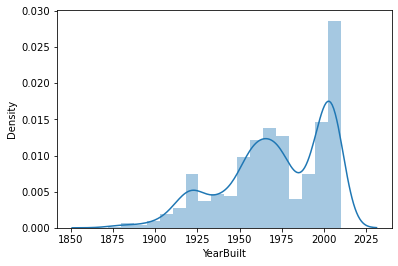

In [1077]:
sns.distplot((df.YearBuilt))

In [1078]:
from scipy import stats


# Örnek verileri oluşturma


# Box-Cox dönüşümü
data, param = stats.boxcox(df.YearBuilt)
data2, param = stats.boxcox(df_test.YearBuilt)

print("Box-Cox dönüşümü sonrası:")
print("Ortalama değer:", data.mean())
print("Standart sapma:", data.std())


from scipy.stats import shapiro



# Shapiro-Wilk normalite testini yap
stat, p = shapiro(scaler.fit_transform(data.reshape(-1,1)))
print("\nSHAPIRO:\n")
print('Test İstatistiği=%.3f, p-değeri=%.3f' % (stat, p))

# p-değeri 0.05'ten küçükse, normal dağılımdan sapma olduğunu söyleyebiliriz
if p > 0.05:
    print('Dizi normal dağılıyor')
else:
    print('Dizi normal dağılmıyor')
    
    


Box-Cox dönüşümü sonrası:
Ortalama değer: 3.514213643093133e+71
Standart sapma: 1.0764609719986972e+71

SHAPIRO:

Test İstatistiği=0.935, p-değeri=0.000
Dizi normal dağılmıyor


C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

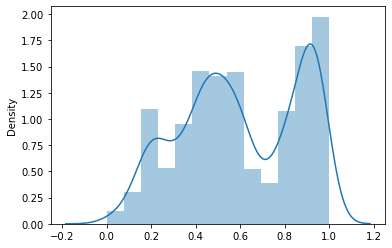

In [1079]:
sns.distplot(scaler.fit_transform(data.reshape(-1,1)))

In [1080]:
df["YearBuilt"]=scaler.fit_transform(data.reshape(-1,1))
df_test["YearBuilt"]=scaler.fit_transform(data2.reshape(-1,1))

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearBuilt', ylabel='Density'>

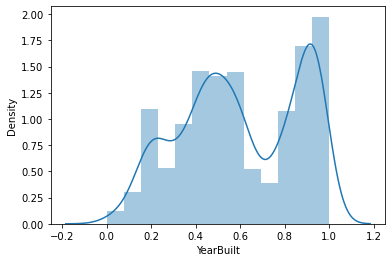

In [1081]:
sns.distplot(df.YearBuilt)

### YearRemodAdd

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearRemodAdd', ylabel='Density'>

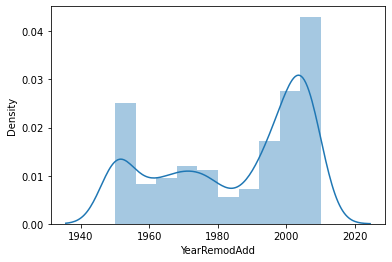

In [1082]:
sns.distplot(df.YearRemodAdd)

In [1083]:
from scipy import stats


# Örnek verileri oluşturma


# Box-Cox dönüşümü
data, param = stats.boxcox(np.sqrt(df.YearRemodAdd))
data2, param = stats.boxcox(df_test.YearRemodAdd)

print("Box-Cox dönüşümü sonrası:")
print("Ortalama değer:", data.mean())
print("Standart sapma:", data.std())


from scipy.stats import shapiro



# Shapiro-Wilk normalite testini yap
stat, p = shapiro(scaler.fit_transform(data.reshape(-1,1)))
print("\nSHAPIRO:\n")
print('Test İstatistiği=%.3f, p-değeri=%.3f' % (stat, p))

# p-değeri 0.05'ten küçükse, normal dağılımdan sapma olduğunu söyleyebiliriz
if p > 0.05:
    print('Dizi normal dağılıyor')
else:
    print('Dizi normal dağılmıyor')
    
    


Box-Cox dönüşümü sonrası:
Ortalama değer: 8.095659729482276e+131
Standart sapma: 2.992759022746702e+131

SHAPIRO:

Test İstatistiği=0.884, p-değeri=0.000
Dizi normal dağılmıyor


C:\Users\Mehmet\anaconda3\lib\site-packages\scipy\stats\morestats.py:912: RuntimeWarning: overflow encountered in power
  variance = np.var(data**lmb / lmb, axis=0)
C:\Users\Mehmet\anaconda3\lib\site-packages\numpy\core\_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
C:\Users\Mehmet\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Mehmet\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


In [1084]:
df["YearRemodAdd"]=scaler.fit_transform(data.reshape(-1,1))
df_test["YearRemodAdd"]=scaler.fit_transform(data2.reshape(-1,1))

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearRemodAdd', ylabel='Density'>

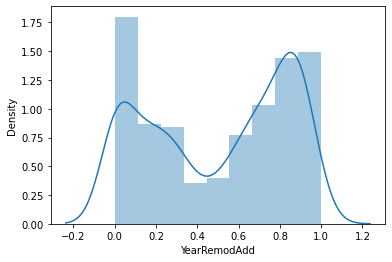

In [1085]:
sns.distplot(df.YearRemodAdd)

### RoofStyle

In [1086]:
df.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [1087]:
def roofstyle_transform(text):
    
    if text=='Gable':
        return 'Gable'
    
    elif text=='Hip':
        return 'Hip'
    
    else:
        return 'Other'

In [1088]:
df['RoofStyle'] = df['RoofStyle'].apply(lambda x:roofstyle_transform(x))
df_test['RoofStyle'] = df_test['RoofStyle'].apply(lambda x:roofstyle_transform(x))

df = pd.get_dummies(df, columns = ["RoofStyle"])
df_test = pd.get_dummies(df_test, columns = ["RoofStyle"])

### RoofMatl

In [1089]:
df.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [1090]:
mapping_roofmatl= {'Tar&Grv': 'Other', 'WdShngl': 'Other','WdShake': 'Other','Metal': 'Other','Membran': 'Other','Roll': 'Other',
                   'ClyTile': 'Other'}


df['RoofMatl'] = df['RoofMatl'].replace(mapping_roofmatl)
df_test['RoofMatl'] = df_test['RoofMatl'].replace(mapping_roofmatl)

In [1091]:
df = pd.get_dummies(df, columns = ["RoofMatl"])
df_test = pd.get_dummies(df_test, columns = ["RoofMatl"])

### Exterior1-2st

In [1092]:
df.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [1093]:
df.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [1094]:
df_test["Exterior1st"].fillna(df.Exterior1st.mode()[0], inplace=True)

In [1095]:
df_test["Exterior2nd"].fillna(df.Exterior2nd.mode()[0], inplace=True)

In [1096]:
mapping_Exterior= {'WdShing': 'Plywood', 'Stucco': 'CemntBd','AsbShng': 'CemntBd','Brk Cmn': 'MetalSd','BrkComm': 'MetalSd','Stone': 'MetalSd',
                   'AsphShn': 'CemntBd', 'BrkFace': 'MetalSd',
                   'ImStucc': 'CemntBd', 'CBlock': 'MetalSd'}


df['Exterior1st'] = df['Exterior1st'].replace(mapping_Exterior)
df_test['Exterior1st'] = df_test['Exterior1st'].replace(mapping_Exterior)

df['Exterior2nd'] = df['Exterior2nd'].replace(mapping_Exterior)
df_test['Exterior2nd'] = df_test['Exterior2nd'].replace(mapping_Exterior)

In [1097]:
df = pd.get_dummies(df, columns = ["Exterior1st"])
df_test = pd.get_dummies(df_test, columns = ["Exterior1st"])

df = pd.get_dummies(df, columns = ["Exterior2nd"])
df_test = pd.get_dummies(df_test, columns = ["Exterior2nd"])

### MasVnrType

In [1098]:
df["MasVnrType"].fillna(df.MasVnrType.mode()[0], inplace=True)

df_test["MasVnrType"].fillna(df.MasVnrType.mode()[0], inplace=True)

In [1099]:
df.MasVnrType.value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [1100]:
mapping_mastype= {'BrkCmn': 'BrkFace'}



df['MasVnrType'] = df['MasVnrType'].replace(mapping_mastype)
df_test['MasVnrType'] = df_test['MasVnrType'].replace(mapping_mastype)

In [1101]:
df = pd.get_dummies(df, columns = ["MasVnrType"])
df_test = pd.get_dummies(df_test, columns = ["MasVnrType"])

### MasvnrArea

In [1102]:
df["MasVnrArea"].fillna(df.MasVnrArea.mean(), inplace=True)

df_test["MasVnrArea"].fillna(df.MasVnrArea.mean(), inplace=True)

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

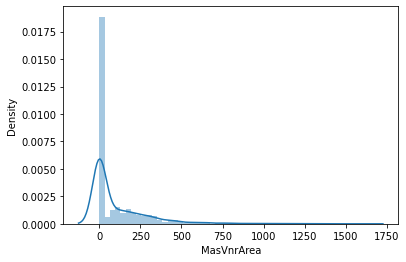

In [1103]:
sns.distplot(df.MasVnrArea)

In [1104]:

segments = [(0, 1), (1, 250), (250, 500), (500, 750), (750, np.inf)]
values = [0, 1, 2, 3, 4]


value_dict = {i: val for i, val in zip(segments, values)}


df['MasVnrArea'] = pd.cut(df['MasVnrArea'], bins=[s for s, e in segments] + [np.inf], labels=False, right=False)
df['MasVnrArea'] = df['MasVnrArea'].apply(lambda x: value_dict[segments[x]])


df['MasVnrArea'] = df['MasVnrArea'].astype(int)

In [1105]:
df.MasVnrArea.value_counts()

0    861
1    364
2    177
3     37
4     21
Name: MasVnrArea, dtype: int64

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

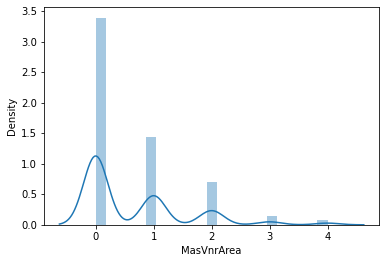

In [1106]:
sns.distplot(df.MasVnrArea)

### ExterQual-Cond

In [1107]:
df.ExterQual.value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [1108]:
def exter_transform(text):
    
    if text=='Ex':
        return 4
    
    elif text=='Gd':
        return 3
    
    if text=='TA':
        return 2
    
    elif text=='Fa':
        return 1
    
    else:
        return 0

In [1109]:
df['ExterQual'] = df['ExterQual'].apply(lambda x:exter_transform(x))
df_test['ExterQual'] = df_test['ExterQual'].apply(lambda x:exter_transform(x))

df['ExterCond'] = df['ExterCond'].apply(lambda x:exter_transform(x))
df_test['ExterCond'] = df_test['ExterCond'].apply(lambda x:exter_transform(x))

### Foundation

In [1110]:
df.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [1111]:
mapping_f= {'Stone': 'Slab','Wood': 'Slab'}


df['Foundation'] = df['Foundation'].replace(mapping_f)
df_test['Foundation'] = df_test['Foundation'].replace(mapping_f)


In [1164]:
df = pd.get_dummies(df, columns = ["Foundation"])
df_test = pd.get_dummies(df_test, columns = ["Foundation"])

### BsmtQual-Cond

In [1112]:
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [1113]:
df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [1114]:
df["BsmtQual"].fillna(df.BsmtQual.mode()[0], inplace=True)

df_test["BsmtQual"].fillna(df.BsmtQual.mode()[0], inplace=True)

df["BsmtCond"].fillna(df.BsmtCond.mode()[0], inplace=True)

df_test["BsmtCond"].fillna(df.BsmtCond.mode()[0], inplace=True)

In [1115]:
def bsmt_transform(text):
    
    if text=='Ex':
        return 5
    
    elif text=='Gd':
        return 4
    
    if text=='TA':
        return 3
    
    elif text=='Fa':
        return 2
    
    elif text=='Po':
        return 1
    
    else:
        return 0

In [1116]:
df['BsmtQual'] = df['BsmtQual'].apply(lambda x:bsmt_transform(x))
df_test['BsmtQual'] = df_test['BsmtQual'].apply(lambda x:bsmt_transform(x))

df['BsmtCond'] = df['BsmtCond'].apply(lambda x:bsmt_transform(x))
df_test['BsmtCond'] = df_test['BsmtCond'].apply(lambda x:bsmt_transform(x))

### BsmtExposure

In [1117]:
df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [1118]:
df["BsmtExposure"].fillna(df.BsmtExposure.mode()[0], inplace=True)

df_test["BsmtExposure"].fillna(df.BsmtExposure.mode()[0], inplace=True)

In [1119]:
def bsmtex_transform(text):
    
    if text=='Gd':
        return 4
    
    elif text=='Av':
        return 3
    
    if text=='Mn':
        return 2
    
    elif text=='No':
        return 1
    
    elif text=='NA':
        return 0

In [1120]:
df['BsmtExposure'] = df['BsmtExposure'].apply(lambda x:bsmtex_transform(x))
df_test['BsmtExposure'] = df_test['BsmtExposure'].apply(lambda x:bsmtex_transform(x))

### FinType

In [1121]:
df.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [1122]:
df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [1123]:
df["BsmtFinType1"].fillna(df.BsmtFinType1.mode()[0], inplace=True)

df_test["BsmtFinType1"].fillna(df.BsmtFinType1.mode()[0], inplace=True)

df["BsmtFinType2"].fillna(df.BsmtFinType2.mode()[0], inplace=True)

df_test["BsmtFinType2"].fillna(df.BsmtFinType2.mode()[0], inplace=True)

In [1124]:
def fintype_transform(text):
    
    if text=='GLQ':
        return 6
    
    elif text=='ALQ':
        return 5
    
    if text=='BLQ':
        return 4
    
    elif text=='Rec':
        return 3
    
    elif text=='LwQ':
        return 2
    
    elif text=='Unf':
        return 1
    
    elif text=='NA':
        return 0

In [1125]:
df['BsmtFinType1'] = df['BsmtFinType1'].apply(lambda x:fintype_transform(x))
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].apply(lambda x:fintype_transform(x))

df['BsmtFinType2'] = df['BsmtFinType2'].apply(lambda x:fintype_transform(x))
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].apply(lambda x:fintype_transform(x))

### FinSF

In [1127]:
df_test["BsmtFinSF1"].fillna(df.BsmtFinSF1.mean(), inplace=True)

df_test["BsmtFinSF2"].fillna(df.BsmtFinSF2.mean(), inplace=True)

In [1128]:
df["BsmtFinSF1"] = np.where(df["BsmtFinSF1"]==0, 1, df["BsmtFinSF1"])
df["BsmtFinSF2"] = np.where(df["BsmtFinSF2"]==0, 1, df["BsmtFinSF2"])

df_test["BsmtFinSF1"] = np.where(df_test["BsmtFinSF1"]==0, 1, df_test["BsmtFinSF1"])
df_test["BsmtFinSF2"] = np.where(df_test["BsmtFinSF2"]==0, 1, df_test["BsmtFinSF2"])

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

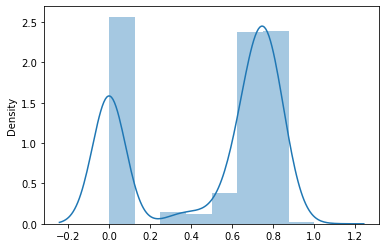

In [1129]:
sns.distplot(scaler.fit_transform(np.log(df.BsmtFinSF1.values.reshape(-1,1))))

In [1130]:
df["BsmtFinSF1"]=scaler.fit_transform(np.log(df.BsmtFinSF1.values.reshape(-1,1)))
df_test["BsmtFinSF1"]=scaler.fit_transform(np.log(df_test.BsmtFinSF1.values.reshape(-1,1)))

In [1131]:
df["BsmtFinSF2"]=scaler.fit_transform(np.log(df.BsmtFinSF2.values.reshape(-1,1)))
df_test["BsmtFinSF2"]=scaler.fit_transform(np.log(df_test.BsmtFinSF2.values.reshape(-1,1)))

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

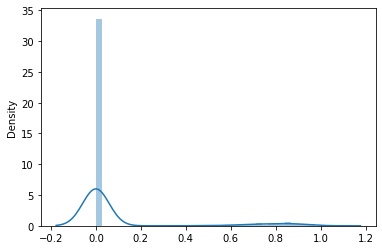

In [1132]:
sns.distplot(scaler.fit_transform(df.BsmtFinSF2.values.reshape(-1,1)))

### UnfSF

In [1136]:
df_test["BsmtUnfSF"].fillna(df.BsmtUnfSF.mean(), inplace=True)

In [1140]:
df["BsmtUnfSF"] = np.where(df["BsmtUnfSF"]==0, 1, df["BsmtUnfSF"])
df_test["BsmtUnfSF"] = np.where(df_test["BsmtUnfSF"]==0, 1, df_test["BsmtUnfSF"])

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

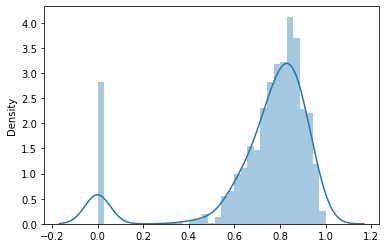

In [1144]:
sns.distplot(scaler.fit_transform(np.log(df.BsmtUnfSF.values.reshape(-1,1))))

In [1145]:
df["BsmtUnfSF"] = scaler.fit_transform(np.log(df.BsmtUnfSF.values.reshape(-1,1)))
df_test["BsmtUnfSF"] = scaler.fit_transform(np.log(df_test.BsmtUnfSF.values.reshape(-1,1)))

### TotalBsmtsf

In [1150]:
df_test["TotalBsmtSF"].fillna(df.TotalBsmtSF.mean(), inplace=True)

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

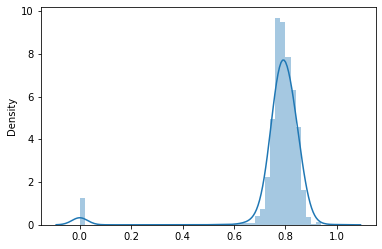

In [1155]:
sns.distplot(scaler.fit_transform(np.log(df.TotalBsmtSF.values.reshape(-1,1))))

In [1152]:
df["TotalBsmtSF"] = np.where(df["TotalBsmtSF"]==0, 1, df["TotalBsmtSF"])
df_test["TotalBsmtSF"] = np.where(df_test["TotalBsmtSF"]==0, 1, df_test["TotalBsmtSF"])

In [1157]:
df["TotalBsmtSF"] = scaler.fit_transform(np.log(df.TotalBsmtSF.values.reshape(-1,1)))

C:\Users\Mehmet\AppData\Local\Temp\ipykernel_28556\2750050828.py:1: RuntimeWarning: divide by zero encountered in log
  df["TotalBsmtSF"] = scaler.fit_transform(np.log(df.TotalBsmtSF.values.reshape(-1,1)))


ValueError: Input contains infinity or a value too large for dtype('float64').

In [1158]:
df_test["TotalBsmtSF"] = scaler.fit_transform(np.log(df_test.TotalBsmtSF.values.reshape(-1,1)))

### Heating

In [1167]:
df.Heating.value_counts()

GasA     1428
GasW       18
Other      14
Name: Heating, dtype: int64

In [1162]:
mapping_heating= {'Grav': 'Other','Wall': 'Other','OthW': 'Other','Floor': 'Other'}


df['Heating'] = df['Heating'].replace(mapping_heating)
df_test['Heating'] = df_test['Heating'].replace(mapping_heating)

df = pd.get_dummies(df, columns = ["Heating"])
df_test = pd.get_dummies(df_test, columns = ["Heating"])


In [1170]:
df.HeatingQC.value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [1171]:
def HeatingQC_transform(text):

    
    if text=='Ex':
        return 4
    
    elif text=='Gd':
        return 3
    
    elif text=='TA':
        return 2
    
    elif text=='Fa':
        return 1
    
    elif text=='Po':
        return 0
    
df['HeatingQC'] = df['HeatingQC'].apply(lambda x:HeatingQC_transform(x))
df_test['HeatingQC'] = df_test['HeatingQC'].apply(lambda x:HeatingQC_transform(x))

### Central Air

In [1175]:
df.CentralAir

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1455    Y
1456    Y
1457    Y
1458    Y
1459    Y
Name: CentralAir, Length: 1460, dtype: object

In [1177]:
df['CentralAir'] = df['CentralAir'].replace({'N': 0, 'Y': 1})
df_test['CentralAir'] = df_test['CentralAir'].replace({'N': 0, 'Y': 1})

In [1178]:
df['CentralAir'] = df['CentralAir'].astype(int)
df_test['CentralAir'] = df_test['CentralAir'].astype(int)

### Electrical

In [1186]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [1187]:
mapping_elec= {'FuseP': 'SBrkr','Mix': 'SBrkr'}


df['Electrical'] = df['Electrical'].replace(mapping_elec)
df_test['Electrical'] = df_test['Electrical'].replace(mapping_elec)

df = pd.get_dummies(df, columns = ["Electrical"])
df_test = pd.get_dummies(df_test, columns = ["Electrical"])

### FlrSf

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

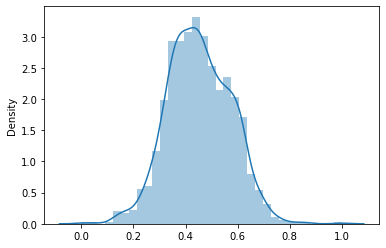

In [1214]:
sns.distplot(preprocessing.minmax_scale(np.log(df["1stFlrSF"])))

In [1215]:
df["1stFlrSF"]=preprocessing.minmax_scale(np.log(df["1stFlrSF"]))
df_test["1stFlrSF"]=preprocessing.minmax_scale(np.log(df_test["1stFlrSF"]))

In [1208]:
df["2ndFlrSF"] = np.where(df["2ndFlrSF"]==0, 1, df["2ndFlrSF"])
df_test["2ndFlrSF"] = np.where(df_test["2ndFlrSF"]==0, 1, df_test["2ndFlrSF"])

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

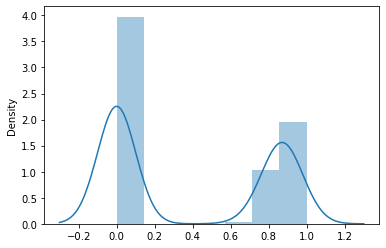

In [1213]:
sns.distplot(preprocessing.minmax_scale(np.log(df["2ndFlrSF"])))

In [1216]:
df["1stFlrSF"]=preprocessing.minmax_scale(np.log(df["2ndFlrSF"]))
df_test["1stFlrSF"]=preprocessing.minmax_scale(np.log(df_test["2ndFlrSF"]))

In [1217]:
df.isnull().sum()[0:40]

MSZoning          0
LotFrontage       0
LotArea           0
LandContour       0
LandSlope         0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        0
ExterQual         0
ExterCond         0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
HeatingQC         0
CentralAir        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu     690
GarageType       81
GarageYrBlt      81
dtype: int64